# Homework 3 Part 2

This is an individual assignment.

**Due: Friday, November 4 @ 11:59pm**

---

# Question 1

In this problem, you will be working with the [MNIST Data Set](http://yann.lecun.com/exdb/mnist/) to extract features, perform classification using the K-Nearest Neighbors algorithm and evaluate your results using metrics such as accuracy, ROC curve and confusion matrices.

The MNIST data set contains $28\times 28$ images of handwritten digits (class labels 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9). This data set has 60,000 images for training and 10,000 images for testing. Each image is a 8-bit grayscale image and so the intensity values per pixel range from 0-255.

The following code cell loads the MNIST data set and displays some examples. (The data is already available in your repository as **"mnist_train.csv"** and **"mnist_test.csv"**.)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [89]:
# Loading MNIST data set
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

# Loading Training Samples
train_data = np.loadtxt("mnist_train.csv", delimiter=",")
X_train = train_data[:,1:]
t_train = train_data[:,0]

# Loading Test Samples
test_data = np.loadtxt("mnist_test.csv", delimiter=",") 
X_test = test_data[:,1:]
t_test = test_data[:,0]

X_train.shape, t_train.shape, X_test.shape, t_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

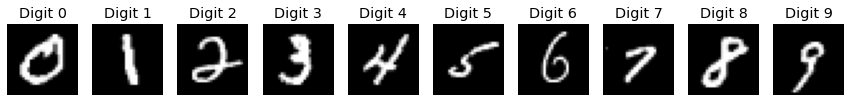

In [90]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[np.where(t_train==i)[0][1],:].reshape((28,28)), cmap='gray')
    plt.title('Digit '+str(i)); plt.axis('off');

## Problem Set

Using this dataset, answer the following questions:

1. Create a PCA object using ```scikit-learn``` functions and plot the cumulative explained variance ratio. How many principal components (PCs) would you have to extract in order to preserve 90% of the explained variance in the data?
    * Be sure to apply any necessary preprocessing.

2. Plot the first 9 principal components you found in (3) with the training data. Based on this data, what is each principal component representing?

3. Reconstruct test images using the number of PCs you found in (1). Display examples.

4. Train the following ```scikit-learn``` pipelines:

    1. Pipeline 1 - scales data, reduces dimensions with PCA and train an SVM with RBF kernel.
    
    2. Pipeline 2 - scales data, and train an SVM with RBF kernel.

5. Evaluate performance in training and test sets, report performance metrics and 95% CI and discuss on the speed.

### 1. Create a PCA object using ```scikit-learn``` functions and plot the cumulative explained variance ratio. How many principal components (PCs) would you have to extract in order to preserve 90% of the explained variance in the data?
    * Be sure to apply any necessary preprocessing.

In [91]:
from sklearn.decomposition import PCA

# use 1/40 of the data
X_train = X_train[::40]
t_train = t_train[::40]
X_test = X_test[::40]
t_test = t_test[::40]
X_train.shape, t_train.shape, X_test.shape
size =X_train.shape[1]
# create PCA object
pca = PCA(n_components=size)
pca.fit(X_train)

PCA(n_components=784)

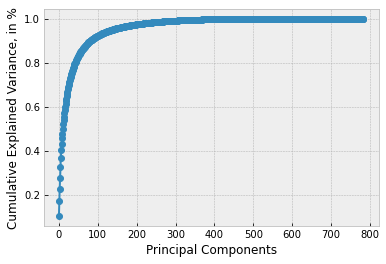

In [92]:
# plot cumalitive explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Principal Components') 
plt.ylabel('Cumulative Explained Variance, in %');

In [93]:
np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)

(array([ 82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
        186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
        199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
        212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,
        225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237,
        238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
        251, 252, 253, 254, 255, 256, 257, 258, 259

In [94]:
np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)[0][0]

82

#### In order to preserve 90% of the explained variance in the data, we need to extract 82 principal components

### 2. Plot the first 9 principal components you found in (3) with the training data. Based on this data, what is each principal component representing?

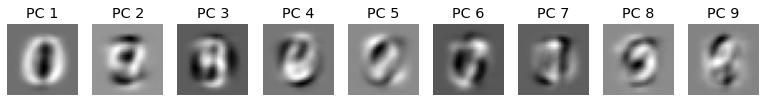

In [95]:
plt.figure(figsize=(15,5))
for i in range(9):
    plt.subplot(1, 10, i+1)
    plt.imshow(pca.components_[i,:].reshape((28,28)), cmap='gray')
    plt.title('PC '+str(i+1));
    plt.axis('off');

Based on this data, each principal component is representing a different amount of variance, where the first component has the most variance and the 9th component has the least variance out of the 9 principal components. The more variance means it has more feature importance.

### 3. Reconstruct test images using the number of PCs you found in (1). Display examples.


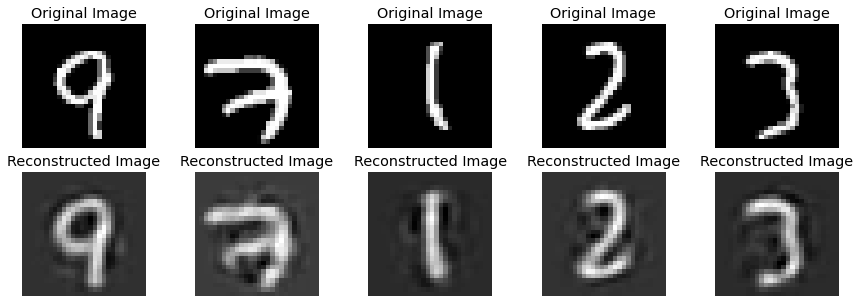

In [117]:
from sklearn.preprocessing import StandardScaler
N_pc = 82
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# reconstruct images in the dataset using 82 PCs
pca_r = PCA(n_components=N_pc)
y_pca = pca_r.fit_transform(X_train_s)

# bring back the original scaling by multiplying by the standard deviation
# and adding the sample mean
X_reconstruct = pca_r.inverse_transform(y_pca)
X_reconstructed = scaler.inverse_transform(X_reconstruct)

N=5
fig = plt.figure(figsize=(15,5))
idx = np.random.choice(range(X_reconstructed.shape[0]),replace=False,size=N)
j=1
for i in range(N):
    fig.add_subplot(2,N,j)
    plt.imshow(X_train[idx[i],:].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title('Original Image');

    fig.add_subplot(2,N,j+N)
    plt.imshow(X_reconstructed[idx[i],:].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title('Reconstructed Image');
    j+=1

### 4. Train the following ```scikit-learn``` pipelines:

    1. Pipeline 1 - scales data, reduces dimensions with PCA and train an SVM with RBF kernel.
    
    2. Pipeline 2 - scales data, and train an SVM with RBF kernel.



In [132]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Pipeline 1
# scale data using standard scalar, use PCA and SVM with RBF kernel
pipe1 = Pipeline(steps=[('scaler', StandardScaler()),
                        ('PCA', PCA()),
                        ('SVM', SVC(kernel='rbf', class_weight='balanced'))])

pipe1

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA()),
                ('SVM', SVC(class_weight='balanced'))])

In [130]:
from sklearn.model_selection import GridSearchCV 
# hyperparameter tuning
# adjust n_components for PCA and margin hardness(C) for SVM with RBF

param_grid1 = dict(SVM__C=[1, 5, 10, 50],
               PCA__n_components=[5, 10, 20,30, 50, 70, 86, 90, 100, 200, 300, 400])
grid1 = GridSearchCV(pipe1, param_grid1, refit=True)
grid1.fit(X_train, t_train) 
grid1.best_params_

{'PCA__n_components': 86, 'SVM__C': 10}

In [139]:
fin_model1 = grid1.best_estimator_

In [133]:
# Pipeline 2
# scale data using standard scalar, train data using SVM with RBF
pipe2 = Pipeline(steps=[('scaler', StandardScaler()),
                       ('SVM', SVC(kernel='rbf', class_weight='balanced'))])

pipe2

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVM', SVC(class_weight='balanced'))])

In [137]:
# hyperparameter tuning
# adjust margin hardness(C) for SVM with RBF

param_grid2 = dict(SVM__C=[1, 3, 5, 6, 7, 8, 9, 10, 50])
grid2 = GridSearchCV(pipe2, param_grid2, refit=True)
grid2.fit(X_train, t_train) 
grid2.best_params_

{'SVM__C': 7}

In [138]:
fin_model2 = grid2.best_estimator_

### 5. Evaluate performance in training and test sets, report performance metrics and 95% CI and discuss on the speed.

In [149]:
# Evaluate performance of Pipeline 1
from scipy import stats
from sklearn.model_selection import cross_val_score

# 95% confidence interval
scores1 = cross_val_score(fin_model1, X_train, t_train, 
                         scoring='accuracy',
                         cv=5)
confidence = 0.95 
print("95% Confidence Interval Pipeline 1: ")
stats.t.interval(confidence,
                len(scores1)-1,
                loc = scores1.mean(), 
                scale=scores1.std(ddof=1)/np.sqrt(len(scores1)))

95% Confidence Interval Pipeline 1: 


(0.8529297934607656, 0.8977368732059012)

In [141]:
# Predict the labels for the train/test data and measure the time for
# Pipeline 1
t0 = time()
y_train1 = fin_model1.predict(X_train)
y_test1 = fin_model1.predict(X_test)
t1 = time()

In [148]:
from sklearn.metrics import accuracy_score
from time import time

print("Pipeline 1 Time: %.2g sec " % (t1-t0))
print('Accuracy in Training:', accuracy_score(t_train, y_train1)*100,'%\n')
print('Accuracy in Test:', accuracy_score(t_test, y_test1)*100,'%')

Pipeline 1 Time: 0.44 sec 
Accuracy in Training: 99.6 %

Accuracy in Test: 86.8 %


In [150]:
# Evaluate performance of Pipeline 2

# 95% confidence interval
scores2 = cross_val_score(fin_model2, X_train, t_train, 
                         scoring='accuracy',
                         cv=5)
confidence = 0.95 
print("95% Confidence Interval Pipeline 2: ")
stats.t.interval(confidence,
                len(scores2)-1,
                loc = scores2.mean(), 
                scale=scores2.std(ddof=1)/np.sqrt(len(scores2)))

95% Confidence Interval Pipeline 2: 


(0.853255162655155, 0.8800781706781782)

In [151]:
# Predict the labels for the train/test data and measure the time for
# Pipeline 2
t0 = time()
y_train2 = fin_model2.predict(X_train)
y_test2 = fin_model2.predict(X_test)
t1 = time()

In [152]:
print("Pipeline 2 Time: %.2g sec " % (t1-t0))
print('Accuracy in Training:', accuracy_score(t_train, y_train2)*100,'%\n')
print('Accuracy in Test:', accuracy_score(t_test, y_test2)*100,'%')

Pipeline 2 Time: 0.75 sec 
Accuracy in Training: 100.0 %

Accuracy in Test: 83.2 %


Based on the results, Pipeline 1, where PCA is used to reduce dimensions and SVM with rbf to train the data, seems to be the most optimal since it takes less time to predict and the accuracy in the test set is larger. Also, since pipeline 2 has an 100% accuracy in training, it indicates overfitting, which explains its lower accuracy in the test set

---

# Problem 2

In this problem, you will be working with the [Breast Cancer Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer).

The Breast Cancer data set contains 30 feature descriptors (mean, standard error, and "worst" or largest of radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension) to characterize cell types as benign (class 1) or malignant (class 0). The Breast Cancer data set contains 569 samples each with 30 attributes/features.

Let's load the data:

In [711]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(return_X_y=False)

X = data.data
t = data.target

X.shape, t.shape

((569, 30), (569,))

In [712]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [713]:
# Array with all Feature Names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [714]:
# Unique labels in the target vector and its counts

np.unique(t, return_counts=True)

# The malignant class (class 0) has 212 samples
# The benign class (class 1) has 357 samples

(array([0, 1]), array([212, 357]))

## Problem Set

Answer the following questions:

1. Train a logistic regression classifier with the L1 penalty (Lasso penalty). Run a 4-fold cross-validation (CV) to learn what the best penalty weight should be. Which features were discarded in the final trained model?

2. Perform feature selection with Recursive Feature Elimination (RFE) using a Logistic Regression classifier with the default parameters. Which subset of features were selected? Train a logistic regression classifier (with the default parameters) on this subset of features.

3. Compare performance of the two models from (2) and (3) using the test set. Which model performs the best?

### 1. Train a logistic regression classifier with the L1 penalty (Lasso penalty). Run a 4-fold cross-validation (CV) to learn what the best penalty weight should be. Which features were discarded in the final trained model?



In [715]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold,RepeatedStratifiedKFold
# split data into training/test sets
X_train, X_test, t_train, t_test = train_test_split(X, t,
                                                    test_size=0.2,
                                                   stratify=t)
#Scale data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)


In [716]:
# Logistic regression classifier with the L1 penalty 
lr = LogisticRegression(penalty='l1',C=0.1, solver='liblinear',
                        multi_class='auto')
lr.fit(X_train, t_train)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [717]:
#Classifier
pipeline1 = Pipeline(steps=[('scaler', StandardScaler()),
                           ('classifier', lr)])

# 4-Fold CV
cv = StratifiedKFold(n_splits=4,shuffle=True)
# Get different weights
weights, params = [], []

for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10.0**c, random_state=0, solver='liblinear', multi_class='auto')
    lr.fit(X_train, t_train)
    weights.append(lr.coef_[0])
    params.append(10.0**c)
    w = np.array(weights)
    
# Dictionary of weights for gridsearch CV
weights_ = []
for i in range(80):
    val = np.linspace(0.0001,1.0,80)[i]
    if(i!=79):
        val2 = np.linspace(0.0001,1.0,80)[i+1]
    else:
        val2 = 2
    dict_1 = {0:val, 1:val}
    dict_2 = {0:val , 1:val2}
    dict_3 = {0:val2, 1:val}
    weights_.append(dict_1)
    weights_.append(dict_2)
    weights_.append(dict_3)
    
# 4-Fold CV to find most optimal penalty weight
param_grid ={'classifier__class_weight':weights_}
grid_search = GridSearchCV(pipeline1, param_grid=param_grid, refit=True,
                           scoring='accuracy', cv=cv)
#Train the model
grid_search.fit(X_train, t_train)
print("Best penalty weight: ",grid_search.best_params_)

Best penalty weight:  {'classifier__class_weight': {0: 0.9240582278481013, 1: 0.9240582278481013}}


In [718]:
model1 = grid_search.best_estimator_

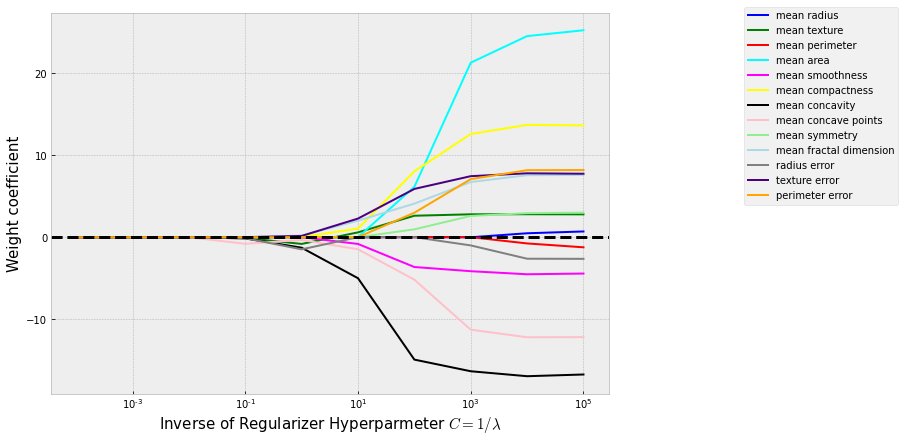

In [719]:
#Plot first 13 features 
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black','pink', 'lightgreen',
          'lightblue','gray', 'indigo', 'orange']
for column, color in zip(range(w.shape[1]), colors):
    plt.plot(params, w[:, column], label=data.feature_names[column],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3) 
plt.ylabel('Weight coefficient', size=15)
plt.xlabel('Inverse of Regularizer Hyperparmeter $C=1/\lambda$',size=15) 
plt.xscale('log')
plt.legend(loc='upper left',fontsize=25)
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True);

Based on these results for the first 13 features, mean symmetry, mean texture,mean radius, mean perimeter, and radius error should be disregarded from the final model since they are strongly approaching zero

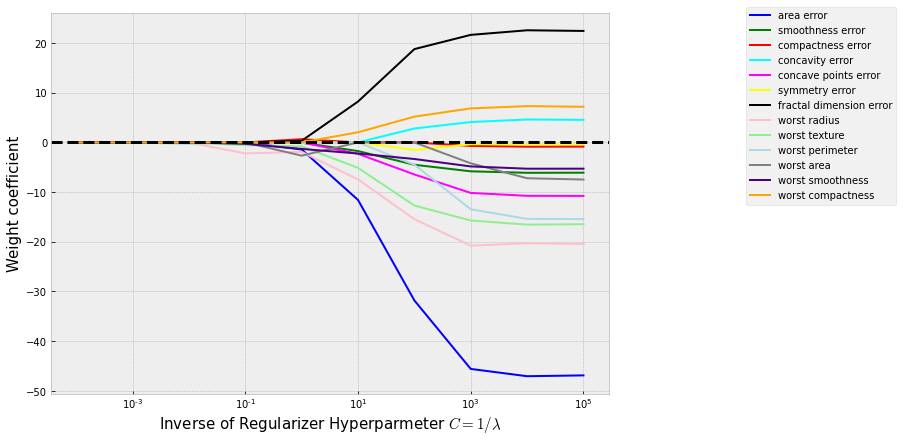

In [720]:
#Plot next 13 features
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black','pink', 'lightgreen',
          'lightblue','gray', 'indigo', 'orange']
for column, color in zip(range(w.shape[1]), colors):
    plt.plot(params, w[:, column+13], label=data.feature_names[column+13],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3) 
plt.ylabel('Weight coefficient', size=15)
plt.xlabel('Inverse of Regularizer Hyperparmeter $C=1/\lambda$',size=15) 
plt.xscale('log')
plt.legend(loc='upper left',fontsize=25)
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True);

Based on the results for the next 13 features, symmetry error, compactness error, concavity error, worst smoothness, and smoothness error should be disregarded from the final model since they are strongly approaching zero

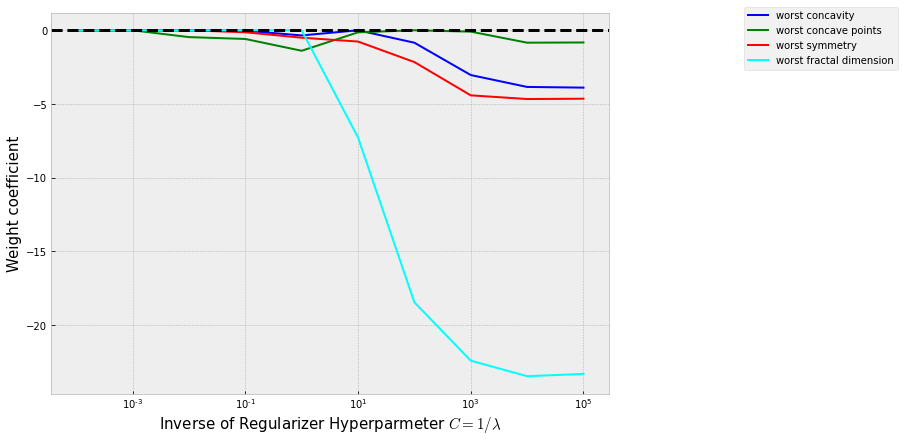

In [721]:
# Plot last 4 features
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan']
for column, color in zip(range(w.shape[1]), colors):
    plt.plot(params, w[:, column+26], label=data.feature_names[column+26],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3) 
plt.ylabel('Weight coefficient', size=15)
plt.xlabel('Inverse of Regularizer Hyperparmeter $C=1/\lambda$',size=15) 
plt.xscale('log')
plt.legend(loc='upper left',fontsize=25)
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True);

 Based on the last 4 features, worst convcave points should be disregarded since it is strongly approaching zero

### 2. Perform feature selection with Recursive Feature Elimination (RFE) using a Logistic Regression classifier with the default parameters. Which subset of features were selected? Train a logistic regression classifier (with the default parameters) on this subset of features.


In [722]:
from sklearn.feature_selection import RFE
# Logistic regression classifier with default params
lr2 = LogisticRegression()
#lr2.fit(X_train, t_train)

rfe = RFE(estimator=lr2)
rfe.fit(X_train, t_train);

In [723]:
# True means the feature is kept, False means the feature is ignored

rfe_support = [final_model1.named_steps['RFE'].support_][0]
rfe_support = rfe_support[:-1]
rfe_support
#data.feature_names[1:][rfe_support]

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True, False, False, False,  True,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False,  True])

In [724]:

scores=[]
features_to_keep={}

for i in range(30):
    rfe = RFE(estimator=lr2, n_features_to_select=30-i, step=1)
    rfe.fit(X_train, t_train)
    scores+=[rfe.score(X_train, t_train)]
    features_to_keep[30-i]=data.feature_names[1:][rfe_support]
    
scores, features_to_keep

([0.9934065934065934,
  0.9934065934065934,
  0.9934065934065934,
  0.9934065934065934,
  0.9934065934065934,
  0.9934065934065934,
  0.9912087912087912,
  0.9934065934065934,
  0.9912087912087912,
  0.9912087912087912,
  0.9912087912087912,
  0.9912087912087912,
  0.9934065934065934,
  0.9868131868131869,
  0.989010989010989,
  0.9846153846153847,
  0.9868131868131869,
  0.9868131868131869,
  0.9912087912087912,
  0.989010989010989,
  0.9846153846153847,
  0.978021978021978,
  0.9802197802197802,
  0.9802197802197802,
  0.967032967032967,
  0.967032967032967,
  0.9560439560439561,
  0.9538461538461539,
  0.9582417582417583,
  0.9164835164835164],
 {30: array(['mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
         'mean concavity', 'mean concave points', 'mean symmetry',
         'texture error', 'area error', 'concave points error',
         'symmetry error', 'worst texture', 'worst smoothness',
         'worst concave points', 'worst fractal dimension'], dtype='<U

In [725]:
print("The features that were kept were: ", data.feature_names[1:][rfe_support])

The features that were kept were:  ['mean texture' 'mean perimeter' 'mean area' 'mean smoothness'
 'mean concavity' 'mean concave points' 'mean symmetry' 'texture error'
 'area error' 'concave points error' 'symmetry error' 'worst texture'
 'worst smoothness' 'worst concave points' 'worst fractal dimension']


In [726]:
import numpy as np
# Find indicies where the features are false in rfe_support to remove
index = []
for i in range(29):
    # append index where removed features are
    if(rfe_support[i]==False):
        index.append(i)

# create a subset training and test set with only the selected features
X_train_n = np.delete(X_train, index, 1)
X_test_n = np.delete(X_test, index, 1)

X_train_n.shape, X_test_n.shape

((455, 16), (114, 16))

In [727]:
# Train logistic regression classifier on the subset of features
lr3 = LogisticRegression()

model2 = lr3.fit(X_train_n, t_train)

In [728]:
lr3.score(X_train_n, t_train)

0.9758241758241758


### 3. Compare performance of the two models from (2) and (3) using the test set. Which model performs the best?

In [729]:
# Evaluate performance of Model 1 from Question 1
from scipy import stats
from sklearn.model_selection import cross_val_score

# 95% confidence interval
scores1 = cross_val_score(model1, X_train, t_train, 
                         scoring='accuracy',
                         cv=5)
confidence = 0.95 
print("95% Confidence Interval Model 1: ")
stats.t.interval(confidence,
                len(scores1)-1,
                loc = scores1.mean(), 
                scale=scores1.std(ddof=1)/np.sqrt(len(scores1)))

95% Confidence Interval Model 1: 


(0.9419442122159513, 0.9833305130587743)

In [730]:
# Evaluate performance of test set in Model 1 from Question 1
y_test_M1 = model1.predict(X_test)
print('Accuracy in Test:', accuracy_score(t_test, y_test_M1)*100,'%')

Accuracy in Test: 97.36842105263158 %


In [731]:
# Evaluate performance of Model 2 from Question 2
scores2 = cross_val_score(model2, X_train, t_train, 
                         scoring='accuracy',
                         cv=5)
confidence = 0.95 
print("95% Confidence Interval Model 1: ")
stats.t.interval(confidence,
                len(scores2)-1,
                loc = scores2.mean(), 
                scale=scores2.std(ddof=1)/np.sqrt(len(scores2)))

95% Confidence Interval Model 1: 


(0.9683737468891748, 0.987670209154781)

In [732]:
# Evaluate performance of test set in Model 2 from Question 2
y_test_M2 = lr3.predict(X_test_n)
print('Accuracy in Test:', accuracy_score(t_test, y_test_M2)*100,'%')

Accuracy in Test: 96.49122807017544 %


Based on the result, Model 1, where we trained a logistic regression classifier with the L1 penalty and ran a 4-fold cross-validation to find the best penalty weight, had the best performance out of the two models based of the higher accuracy in the test set and the larger confidence interval


---

# Question 3

In this problem, you will be working with the Olivetti's dataset:

In [733]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print(faces.images.shape)
print(faces.target.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
(1348,)


In [760]:
X = faces.data # feature matrix, each image is of size 62x47 totaling 2914 dimensions
t = faces.target # target labels

X.shape, t.shape

((1348, 2914), (1348,))

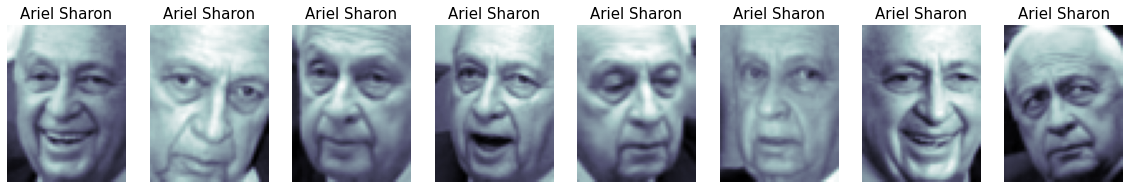

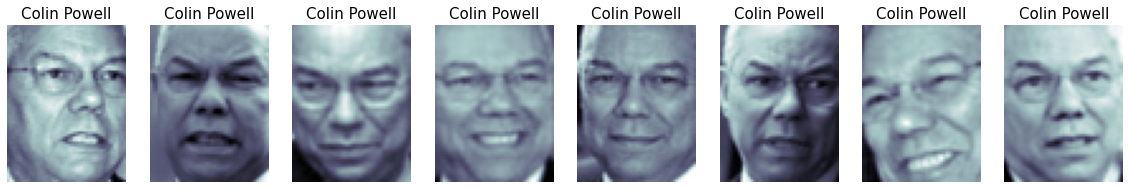

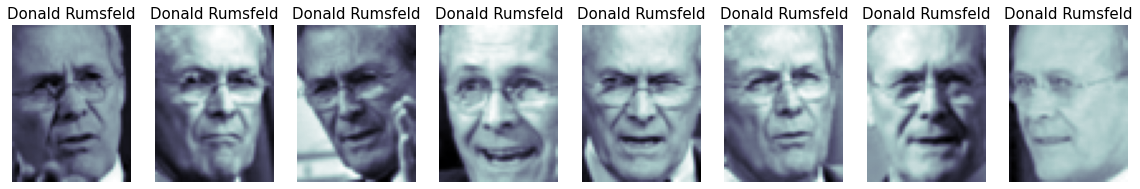

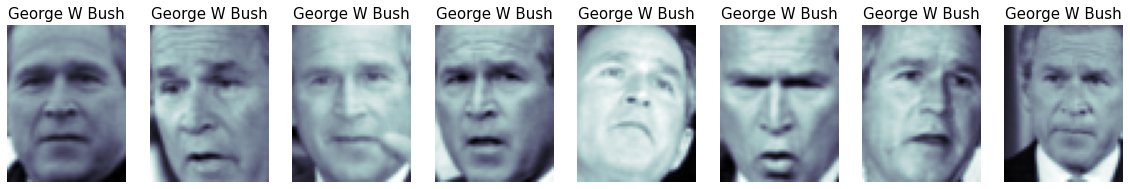

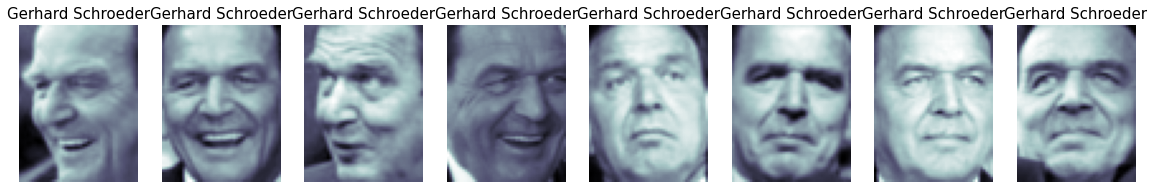

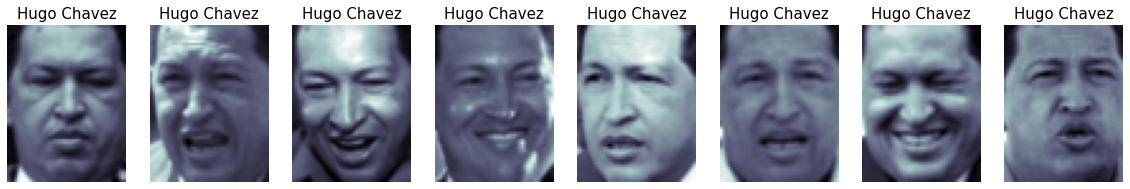

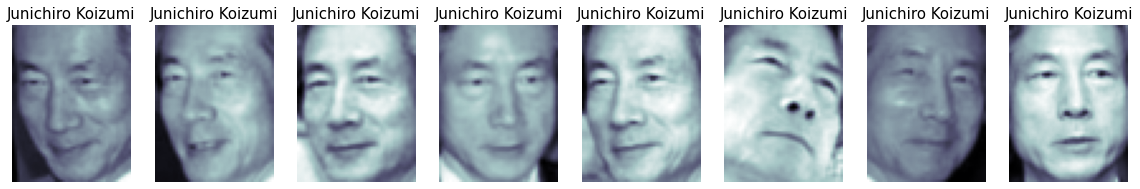

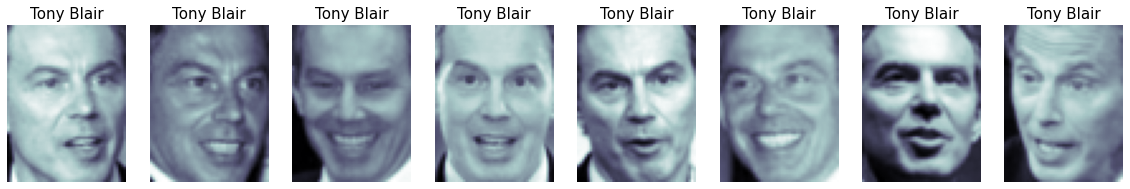

In [735]:
for i in range(len(faces.target_names)):
    rnd_sample = np.random.permutation(np.where(faces.target==i)[0])
    fig=plt.figure(figsize=(20,3))
    for j in range(8):
        fig.add_subplot(1,8,j+1)
        plt.imshow(faces.images[rnd_sample[j],:,:],cmap='bone')
        plt.axis('off');plt.title(faces.target_names[faces.target[rnd_sample[j]]],size=15);

Answer the following questions:
    
1. Find the 2-dimensional embedding using MDS, ISOMAP and LLE. Display example images (see example from lecture 18) and discuss what information each manifold learning algorithm preserves.

2. Train a pipeline to reduce dimensions using ISOMAP followed by a soft-margin SVM classifier with a 3rd-degree polynomial kernel. Use the default value for ```n_neighbors```. Which number of embedding dimensions would you select? Justify your answer.

### 1. Find the 2-dimensional embedding using MDS, ISOMAP and LLE. Display example images (see example from lecture 18) and discuss what information each manifold learning algorithm preserves.


In [748]:
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE

X_train, X_test, t_train, t_test = train_test_split(X, t, 
                                                    stratify=t,
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape, t_train.shape, t_test.shape


((1078, 2914), (270, 2914), (1078,), (270,))

In [749]:
# Interpret the new embedding dimensions via visualization
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)


/var/folders/1_/2tjx84411dl0n9rvnrjdns8c0000gn/T/ipykernel_34367/2715805685.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))


Text(0.5, 1.0, 'MDS')

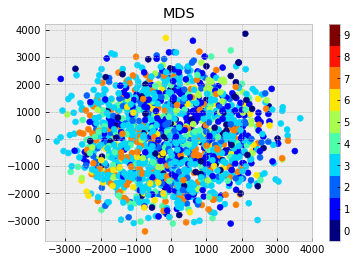

In [750]:
# 2D embedding using MDS
model = MDS(n_components=2)
proj = model.fit_transform(X)

#Plot
plt.plot(100,100)
plt.scatter(proj[:, 0], proj[:, 1], c=t, cmap=plt.cm.get_cmap('jet', 10)) 
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);
plt.title('MDS')

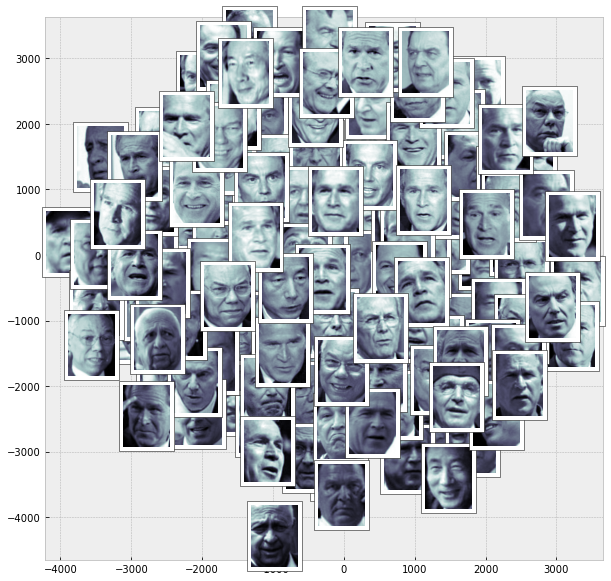

In [761]:
# MDS
fig, ax = plt.subplots(figsize=(10,10))
model_MDS = MDS(n_components=2, max_iter=100,n_init=1)
plot_components(X, model_MDS, images=faces.images.reshape(-1,62,47),
               ax=ax, thumb_frac=0.05,cmap='bone')

Along the y-axis, the images range from brightest to darkest from top to bottom, so its an eigenvector for MDS. Along the x-axis, the images that are more skewed to the left or right have more shadows along the sides of the faces, where as along the middle of the x-axis, the images are more portrait and show a more clear face. This means that shadows and face angle are taken as eigenvectors for MDS.

/var/folders/1_/2tjx84411dl0n9rvnrjdns8c0000gn/T/ipykernel_34367/6686180.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))


Text(0.5, 1.0, 'ISOMAP')

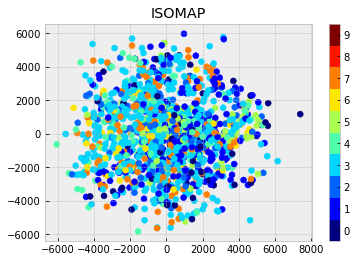

In [762]:
# 2D embedding using ISOMAP
model_2 = Isomap(n_components=2)
proj_2 = model_2.fit_transform(X)

#Plot
plt.plot(100,100)
plt.scatter(proj_2[:, 0], proj_2[:, 1], c=t, cmap=plt.cm.get_cmap('jet', 10)) 
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);
plt.title('ISOMAP')

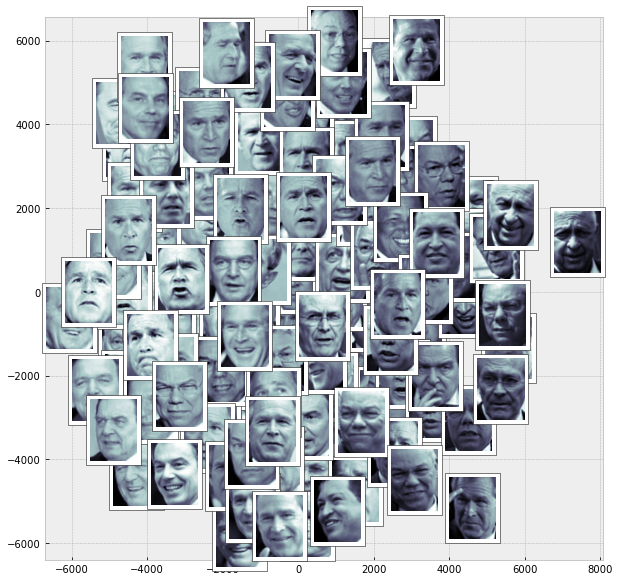

In [764]:
# ISOMAP
fig, ax = plt.subplots(figsize=(10,10))
model_ISOMAP = Isomap(n_components=2)
plot_components(X, model_ISOMAP, images=faces.images.reshape(-1,62,47),
               ax=ax, thumb_frac=0.05,cmap='bone')

For ISOMAP, the images range from light to dark along the postitive x-axis, meaning it carries alot of variance for ISOMAP and is therefore an eigenvector. Along the Y-Axis, the face angles go from facing the right, the center, and then towards the left as you go down the y-axis, which indicates that the face angles features carry high variance for ISOMAP

/var/folders/1_/2tjx84411dl0n9rvnrjdns8c0000gn/T/ipykernel_34367/1980410700.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))


Text(0.5, 1.0, 'LLE')

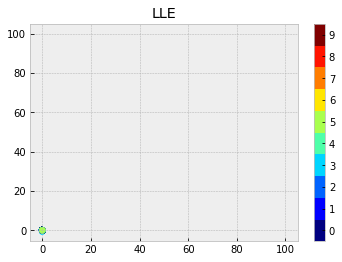

In [779]:
# 2D embedding using LLE
model_LLE = LLE(n_components=2)
proj_3 = model_LLE.fit_transform(X)

#Plot
plt.plot(100,100)
plt.scatter(proj_3[:, 0], proj_3[:, 1], c=t, cmap=plt.cm.get_cmap('jet', 10)) 
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);
plt.title('LLE')

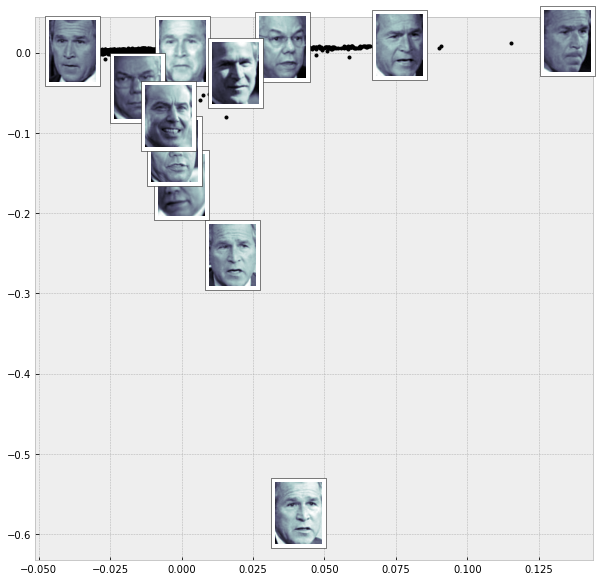

In [775]:
# LLE
fig, ax = plt.subplots(figsize=(10,10))
model_LLE = LLE(n_components=2, n_neighbors=5)
plot_components(X, model_LLE, images=faces.images.reshape(-1,62,47),
               ax=ax, thumb_frac=0.05,cmap='bone')

For LLE, the information is a bit more sparse since LLE preserves the local intrinsic relationships. Along the x-axis, the angles of the faces start from facing the left, then more centered, and then to the far right it is facing more to the right. Along the y-axis, the brightness of the images increase as you go down the y-axis. Overall, the angles of the face and the brightness of the images carry high variance, meaning they are features that should be considered.

### 2. Train a pipeline to reduce dimensions using ISOMAP followed by a soft-margin SVM classifier with a 3rd-degree polynomial kernel. Use the default value for ```n_neighbors```. Which number of embedding dimensions would you select? Justify your answer.

In [796]:
from sklearn.svm import SVC

# Train a pipeline to reduce dimensions using ISOMAP and SVM with 3rd degree poly kernel
pipeline = Pipeline(steps=[('isomap', Isomap()),
                          ('svm', SVC(kernel='poly',degree=3))])


In [797]:
# CV to find the best embedding dimension and C for svm
grid_params = {'isomap__n_components':np.arange(1, 300, 20)}
gridsearch = GridSearchCV(pipeline, grid_params, refit=True)
gridsearch.fit(X, t) 
gridsearch.best_params_

{'isomap__n_components': 81}

Based on the gridsearch CV, I would select 81 as the number of embedding dimensions since it was the most optimal in this pipeline

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___